# MDSuite Binary Salt Walkthrough

In this tutorial, we will use the mdsuite post-processing
package to analyse a molten salt simulation. This should
give user the general idea of how to use the program as 
well as showcase the features of the code

### Step 0 - Import the package

The absolute first thing we have to is import the package. We call this
step zero as it hardly counts as doing anything, but is at the same 
time, the most essential part of the analysis...

In [1]:
import mdsuite as mds  # Import the mdsuite python package

### Step 1 - Create a new project

The first real thing we have to do is create a project. This is where all 
of your experiments will be kept in the future, so make it memorable

In [2]:
Molten_NaCl = mds.Project(name="Molten_NaCl", storage_path="./")  

### Step 1.5 - Give it a description

Another great thing to do before you get into the analysis is to give
the project a short description. This can be done by calling the 
add_description method and will be stored with the class state. It may 
help the weary scientist who can't remember exactly why they have started
stuyding molten salts, but knew at the time there was a good reason... As 
are the effects of Uranium poisening

In [3]:
Molten_NaCl.add_description("Best project ever!")   

### Step 2 - Add an experiment

With the technicalities out of the way, let's get into the meat, 
or meat subsitute if that's your thing. We need to start adding
some data to this project. We structure this data in terms of 
experiments, just as we would in any scientific project

In [4]:
Molten_NaCl.add_experiment(experiment_name="NaCl_1400K", 
                           timestep=0.002, 
                           temperature=1400.0, 
                           units='metal')

Creating a new experiment! How exciting!
** An experiment has been added titled NaCl_1400K **


### Step 2.5 - A closer look

Yes it's a rip off of Seth Meyers but the phrase cannot be exclusive.

What has actually just been achieved is that you have added an experiment
to your project. This instantiated a class called the Experiment class. Now, 
you will want access to this class in order to perform analysis on that experiment.
First, let's look at where it has been stored, we do so by looking at the experiments
attribute of our Project class

In [5]:
Molten_NaCl.experiments

{'NaCl_1400K': <mdsuite.experiment.experiment.Experiment at 0x18bb381f0>}

I know what you're thinking, this looks nothing like my 2 ns simulation of molten NaCl at 1400K in an NVT ensemble. You are correct, so instead of looking directly at guts of the program, why not purely focus on the shiny exterior and run the list_experiments method.

In [6]:
Molten_NaCl.list_experiments()  # List the available experiments

0.) NaCl_1400K


What can been seen here is an index number, and the name of the experiment. If you want to access the experiment, you need to select it from the project. There are three ways to do this so we will demonstrate them all, however, we recommend the first as it is easier to keep track of.

In [7]:
NaCl_1400K = Molten_NaCl.experiments['NaCl_1400K']  # The nice way
NaCl_1400K.analysis_name

'NaCl_1400K'

In [8]:
Molten_NaCl.experiments['NaCl_1400K'].analysis_name  # Maybe less code bu not as simple

'NaCl_1400K'

In [9]:
experiment_list = list(Molten_NaCl.experiments)
NaCl_1400K = Molten_NaCl.experiments[experiment_list[0]]  # Can be useful if you want to iterate over experiments
NaCl_1400K.analysis_name

'NaCl_1400K'

As we said, these ways all achieve the same goal, but each should be used under different circumstances. For performing analysis or reading the information of a specific experiment, we would recommend the first approach as it is easier to keep track of the experiment you are looking at. If you want to save code or are generating a summary, it may not be necessary to declare a variable referencing this class, so use the second method.If you want to run an analyis on several experiment, then you may wish to go for the third as it is easier to loop over, but we will get to that a bit later.

### Step 3 Adding Simulation Data

So you have started your project up and you want to add some real trajectory data to it. We do this by accessing the experiment directly and performing calculations on it. The first thing you have to do is add some data. This is perfomed by the add_data method of the experiment class

In [10]:
NaCl_1400K = Molten_NaCl.experiments['NaCl_1400K']  # Get the experiment from the project

In [11]:
NaCl_1400K.add_data(trajectory_file='../data/trajectory_files/NaCl_1400K.dump', sort=True)  # Add data to the experiment

100%|███████████████████████████████████| 1/1 [00:00<00:00, 11.60it/s]


### Step 4: Performing Calculation

Now that you have some data in one of the experiments, you can start performing analysis on it. Let's start with the einstein diffusion coefficints.

In [12]:
#NaCl_1400K.run_computation.GreenKuboDiffusionCoefficients(plot=True, data_range=150, singular=True, distinct=True)

In [13]:
NaCl_1400K.species['Na']['charge'] = [1]
NaCl_1400K.species['Cl']['charge'] = [-1]

In [14]:
NaCl_1400K.run_computation.NernstEinsteinIonicConductivity(corrected=True)

There is no data to analyse, please run a diffusion calculation to proceed


SystemExit: 1

  0%|                                           | 0/1 [00:00<?, ?it/s]

Unwrapping coordinates
Coordinate unwrapping finished, proceeding with analysis
Unwrapping coordinates
Coordinate unwrapping finished, proceeding with analysis


100%|███████████████████████████████████| 1/1 [00:00<00:00, 30.81it/s]


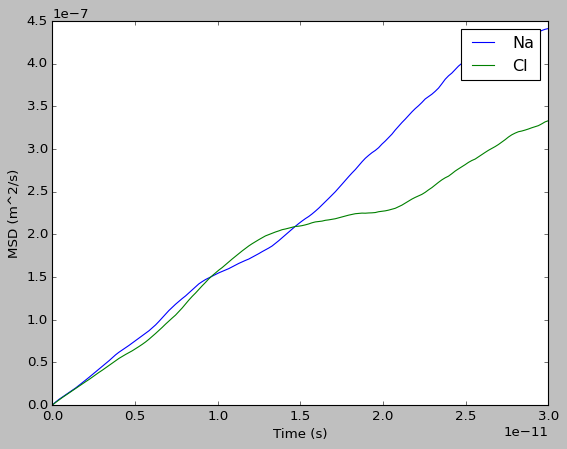

In [15]:
NaCl_1400K.run_computation.EinsteinDiffusionCoefficients(plot=True, data_range=150)

100%|██████████| 21/21 [00:00<00:00, 544.78it/s]
No handles with labels found to put in legend.


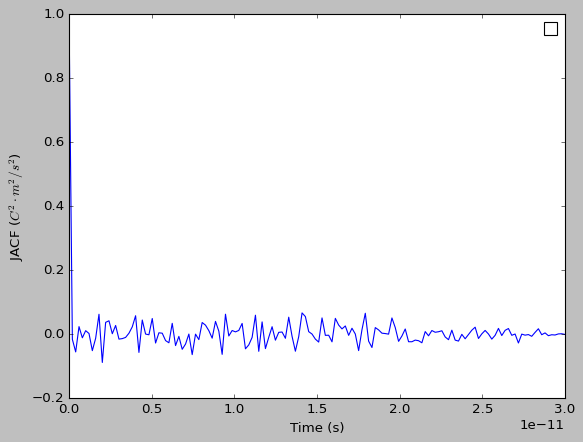

In [16]:
NaCl_1400K.run_computation.GreenKuboIonicConductivity(plot=True, data_range=150)